# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv("/content/PredDeposit.csv")

# Menampilkan 5 data teratas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


In [6]:
# Ukuran dataset
df.shape


(56373, 17)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
# Statistik Deskriptif
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000,56373.000000
mean,40.994767,1395.193249,15.777039,280.701861,2.713267,42.402107,0.630266
std,10.887854,3082.058457,8.342159,281.253563,3.028980,101.990991,2.303356
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,81.000000,8.000000,108.000000,1.000000,-1.000000,0.000000
50%,39.000000,469.000000,16.000000,192.000000,2.000000,-1.000000,0.000000
75%,49.000000,1489.000000,21.000000,346.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#Missing Value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [9]:
#Data Duplikat
df.duplicated().sum()

np.int64(11162)

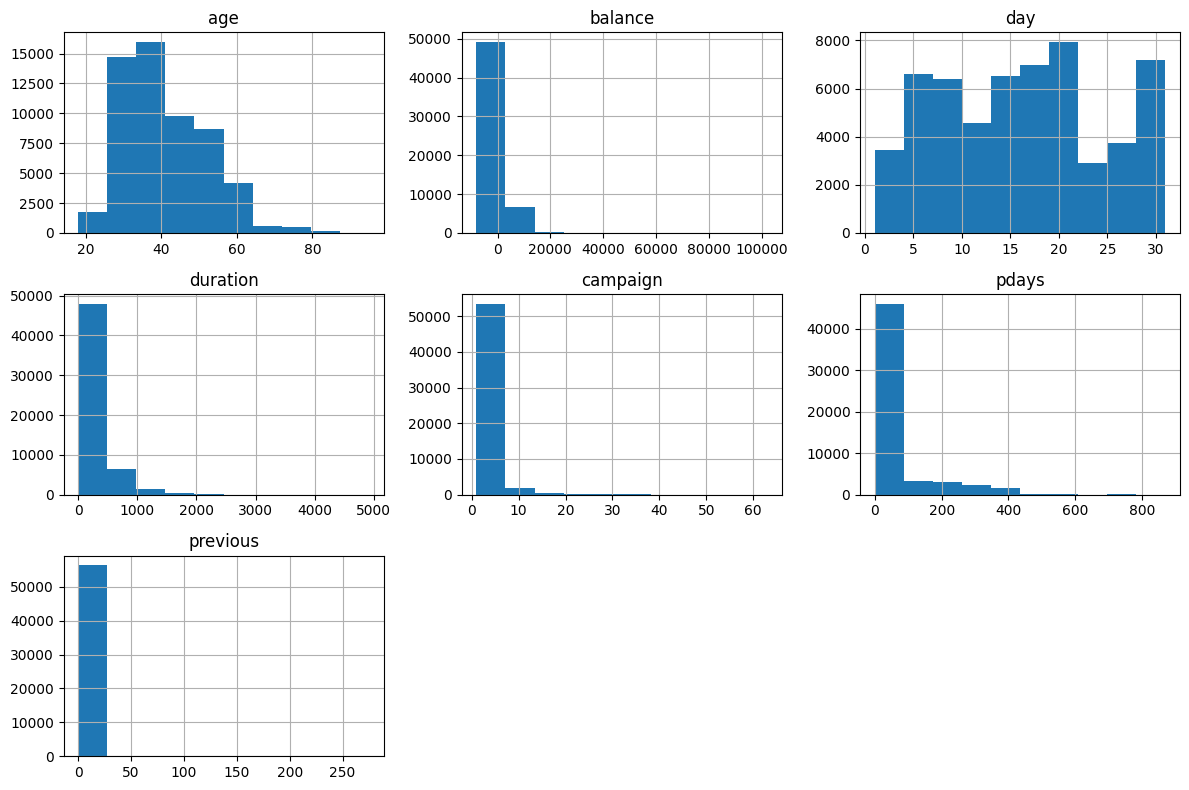

In [10]:
#Distribusi Fitur Numerik
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
target_col = 'deposit'

X = df.drop(columns=[target_col])
y = df[target_col]


In [12]:
# Numerik → mean
for col in X.select_dtypes(include=np.number).columns:
    X[col] = X[col].fillna(X[col].mean())

# Kategorikal → modus
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna(X[col].mode()[0])


In [13]:
X = X.drop_duplicates()
y = y.loc[X.index]


In [14]:
encoder = LabelEncoder()

for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])


In [15]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


In [16]:
scaler = StandardScaler()

num_cols = X.select_dtypes(include=np.number).columns
X[num_cols] = scaler.fit_transform(X[num_cols])


In [17]:
df_processed = pd.concat([X, pd.Series(y, name=target_col)], axis=1)
df_processed.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.701139,-1.326082,-0.275762,-0.300556,-0.13549,0.322106,0.893915,-0.436803,1.514306,-1.298476,0.823773,3.043732,-0.569351,-0.411453,-0.25194,0.444898,1.0
1,1.418617,-1.326082,-0.275762,-0.300556,-0.13549,-0.432640,-1.118674,-0.436803,1.514306,-1.298476,0.823773,4.694057,-0.569351,-0.411453,-0.25194,0.444898,1.0
2,0.006007,1.424008,-0.275762,-0.300556,-0.13549,-0.030305,0.893915,-0.436803,1.514306,-1.298476,0.823773,4.391174,-0.569351,-0.411453,-0.25194,0.444898,1.0
3,1.324443,0.812877,-0.275762,-0.300556,-0.13549,0.365788,0.893915,-0.436803,1.514306,-1.298476,0.823773,1.245848,-0.569351,-0.411453,-0.25194,0.444898,1.0
4,1.230269,-1.326082,-0.275762,1.036362,-0.13549,-0.386987,-1.118674,-0.436803,1.514306,-1.298476,0.823773,1.610861,-0.246560,-0.411453,-0.25194,0.444898,1.0


In [18]:
df_processed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 52087 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  deposit    45211 non-null  float64
dtypes: float64(17)
memory usage: 7.2 MB


In [19]:
import os

output_path = "preprocessing/PredDeposit_preprocessing"
os.makedirs(output_path, exist_ok=True)

# Simpan dataset hasil preprocessing
df_processed.to_csv(
    f"{output_path}/PredDeposit_preprocessed.csv",
    index=False
)

print("Dataset preprocessing berhasil disimpan")


Dataset preprocessing berhasil disimpan


In [21]:
from google.colab import files
files.download("preprocessing/PredDeposit_preprocessing/PredDeposit_preprocessed.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>